## Training and Test datasets

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [6]:
x_train = [[1,2,1],[1,3,2],[1,3,4],[1,5,5],[1,7,5],[1,2,5],
         [1,6,6],[1,7,7]]
y_train = [[0,0,1],[0,0,1],[0,0,1],[0,1,0],[0,1,0],[0,1,0],
         [1,0,0],[1,0,0]]

x_test = [[2,1,1],[3,1,2],[3,3,4]]
y_test = [[0,0,1],[0,0,1],[0,0,1]]

In [11]:
x = tf.placeholder(tf.float32,[None,3])
y = tf.placeholder("float", [None,3])
w = tf.Variable(tf.random_normal([3,3]))
b = tf.Variable(tf.random_normal([1]))

hypothesis = tf.nn.softmax(tf.matmul(x,w) + b)
#cost = tf.nn.sotfmax_cross_entropy_with_logits(logits = tf.matmul(x,w)+b, labels = y)
cost = tf.reduce_mean(-tf.reduce_sum(tf.log(hypothesis)*y, axis=1))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

prediction = tf.argmax(hypothesis, 1)
is_correct = tf.equal(prediction, tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(201):
        cost_val, w_val, _ = sess.run([cost, w, train], feed_dict={x:x_train,y:y_train})
        #print(step, cost_val, w_val)
        
    p,a = sess.run([prediction, accuracy],feed_dict={x:x_test, y:y_test})
    print(p, "{:.2%}".format(a))


[2 2 2] 100.00%


## Learning rate

Learning rate 이 너무 크면 cost 가 발삼됨 inf  

Learning rate이 너무 작으면 cost가 굉장히 작게 변하고 거의 이동되지 않고 최적값을 정해버림

## Non-normalized inputs

다른 x 와는 달리 엄청 큰값이 주어짐 => 값끼리 차이가 많이남  
이러면 타원형으로 cost function 이 생기게 되고 gradient descent 로
모델을 학습시킬 때 빠져나가는 일이 일어날 수 있음

In [14]:
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

In [15]:
 from sklearn.preprocessing import MinMaxScaler
xy = MinMaxScaler().fit_transform(xy) # => min 으로 0, max 로 1을 준 다음에 normalization 함
# 일정 구간안에 값들이 들어오게 함!!!
# 표준화 방법으로도 normalization 을 해줄 수 있음

## MNIST Dataset  
*손으로 쓴 숫자 식별*

In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import random

tf.set_random_seed(333) # for reproducibility

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True) # one_hot 으로 y 데이터를 읽어옴


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

### ***epoch***  
전체 dataset을 한번 학습시킬 때 = > one epoch  
batch size를 통해 전체 data 를 잘라서 학습시킴  
예를 들어 1000 training example 이 있고 batch size 가 500 이라면 2번 돌면 one epoch.

Epoch 0001 cost = 2.845255543
Epoch 0002 cost = 1.119319137
Epoch 0003 cost = 0.884335512
Epoch 0004 cost = 0.771010203
Epoch 0005 cost = 0.701162218
Epoch 0006 cost = 0.651048603
Epoch 0007 cost = 0.614002124
Epoch 0008 cost = 0.583613280
Epoch 0009 cost = 0.559135165
Epoch 0010 cost = 0.538398592
Epoch 0011 cost = 0.520940974
Epoch 0012 cost = 0.505360909
Epoch 0013 cost = 0.491934358
Epoch 0014 cost = 0.479686752
Epoch 0015 cost = 0.469307706
Accuracy :  0.8886
Label: [2]
Prediction: [2]


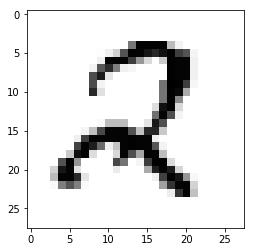

In [32]:
import tensorflow as tf
nb_classes = 10 # 0~9 까지 이기 떄문

# MNIST data image of shape 28 * 28 = 784
x = tf.placeholder("float", [None, 784])
y = tf.placeholder("float", [None, nb_classes]) # 데이터 셋이 이미 one_hot 이 적용된 data set 이기 때문에

w = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes])) # 각각에 맞는 다른 b를 사용

logits = tf.matmul(x,w) + b
hypothesis = tf.nn.softmax(logits)
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels = y)
cost = tf.reduce_mean(cost_i)
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# test model 로 계산
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(y, 1)) # axis 를 1로 지정해주어야 각 instance 에 대한 값을 반환해줌
accuracy = tf.reduce_mean(tf.cast(is_correct, dtype=tf.float32))

# parameters
training_epochs = 15 # 많을 수록 정확도가 올라갈 것임.
# 전체 데이터를 15번 돌리겠다.
# 총 15 epoch

batch_size = 100 # 한번에 training 시킬 data 수

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs):
        avg_cost = 0 # 새로운 one epoch 때마다 avg_cost를 계산해줌
        total_batch = int(mnist.train.num_examples / batch_size)
        # 전체 dataset 개수를 batch_size 로 나눠주면 one epoch 를 완성할 수 있음
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, train], feed_dict = {x:batch_xs, y:batch_ys})
            avg_cost += c/total_batch # batch_size에 해당하는 새로운 cost가 나올 때마다 더해줌
            # 즉 one opoch 에 해당하는 cost 값이 나옴
            
        print('Epoch', "%04d" %(epoch+1), "cost =", "{:.9f}".format(avg_cost))
        # %4d 는 빈칸 네개 우측 정렬을 뜻함           # 소숫점 9째자리까지
        # $04d 는 빈칸을 0으로 채우고 4칸 우측 정렬을 뜻함
    
    print("Accuracy : ", accuracy.eval(session=sess, feed_dict={x:mnist.test.images,
                                                              y: mnist.test.labels}))
    # sess.run() 을 통해서 node를 돌릴수도 있고, node.eval(session=sess,feed_dict ={}) 할 수도 있음
    # 돌릴 노드가 하나일 때에는 간편하게 node.eval() 을 통해서 돌릴 수 있음
    # session 을 넣어도되고 안넣어도 됨
    # Get one and predict
    r = random.randint(0, mnist.test.num_examples-1)
    # 0~인스턴스개수-1 까지 의 범위 중에서 하나를 선택.
    # np.random.randint 의 경우에는 마지막 미만 이지만 보통은 이하임.

    print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1],1))) # 2차원인 차원을 유지시키기 위해서
    # r:r+1
    # one hot으로 되어있기 때문에 argmax를 통해서 어떤 값인지 알아냄
    print("Prediction:" , sess.run(tf.argmax(hypothesis, 1), feed_dict = {x:mnist.test.images[r:r+1]}))

    plt.imshow(mnist.test.images[r:r+1].reshape(28,28), cmap = "Greys", interpolation="nearest")
    plt.show()
    
    

### Sample image show and prediction

In [ ]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples-1)
# 0~인스턴스개수-1 까지 의 범위 중에서 하나를 선택.
# np.random.randint 의 경우에는 마지막 미만 이지만 보통은 이하임.

print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1],1))) # 2차원인 차원을 유지시키기 위해서
# r:r+1
# one hot으로 되어있기 때문에 argmax를 통해서 어떤 값인지 알아냄
print("Prediction:" , sess.run(tf.argmax(hypothesis, 1), feed_dict = {x:mnist.test.images[r:r+1]}))

plt.imshow(mnist.test.images[r:r+1].reshape(28,28), cmap = "Greys", interpolation="nearest")
# matplot 의 imshow (image show) 라는 모듈을 사용해서 image 속성에 해당하는 image 를 출력할 수 있음
plt.show()

## Fashion image

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

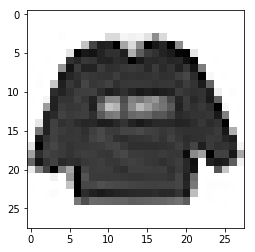

In [56]:
x_data = np.array(x_data, dtype=np.float32)
plt.imshow(x_data[0].reshape(28,28), cmap="Greys", interpolation="nearest")
plt.show()

In [ ]:
data = pd.read_csv("./fashion-mnist-train.csv")
nb_classes = len(data["label"].unique())
data = np.array(data, dtype=np.int32)

train_data = data[:5000]
test_data = data[5000:]

x = tf.placeholder("float",[None,784])
y = tf.placeholder(tf.int32, [None, 1])
w = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

y_one_hot = tf.one_hot(y, nb_classes)
y_one_hot = tf.reshape(y,[-1,nb_classes])

logits = tf.matmul(x,w) + b
hypothesis = tf.nn.softmax(logits)
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels = y_one_hot)
cost = tf.reduce_mean(cost_i)

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

prediction = tf.argmax(hypothesis, axis=1)
is_correct = tf.equal(prediction, tf.argmax(y_one_hot,axis=1) )
accuacy = tf.reduce_mean(tf.cast(is_correct, dtype = tf.float32))
batch_size = 100

x_train_batch, y_train_batch = tf.train.batch([train_data[1:],test_data[:1]], batch_size = batch_size)

epoch = 15

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(epoch):
    avg_cost = 0
    num = train_data.shape[0]//batch_size
    for j in range(num):
        x_train, y_train = sess.run([x_train_batch,y_train_batch])
        c_val = sess.run([cost, train], feed_dict = {x:x_train, y:y_train})
        avg_cost+=c_val/num
    print("Epoch: {:5}\tcost : {:.8f}".format(i, c_val))
    


In [50]:
784**(1/2)

28.0

In [52]:
x_test

[[2, 1, 1], [3, 1, 2], [3, 3, 4]]